# Trieu / m2

In [51]:
!pip install squarify
import squarify 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math
import squarify 

In [53]:
dataframe = pd.read_csv("final.csv")
dataframe = dataframe.rename(columns={'House Direction': 'HouseDirection', 'Balcony Direction': 'BalconyDirection'})
dataframe.head()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,5,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232
1,6,None,None,6,4,+đỏ,5,4.6,NaN,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,7,None,None,4,3,+đỏ+hồng,4,5.0,NaN,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,8,None,None,4,3,+đỏ,4,4.0,NaN,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
4,9,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012


In [54]:
dataframe["Facade"].isnull().mean()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0

In [55]:
# Checking the missing values
dataframe.isnull().sum()

index                   0
HouseDirection          0
BalconyDirection        0
Bedrooms                0
Toilets                 0
Legits                  0
Floors                  0
Facade                  0
Entrance            27465
District                0
Ward                    1
Street                  0
Area                    3
Price                   0
X                       0
Y                       0
dtype: int64

In [56]:
# Fill nan
dataframe['Entrance'].fillna(dataframe['Entrance'].mode()[0], inplace=True)
dataframe['Area'].fillna(dataframe['Area'].mean(), inplace=True)
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum()

index               0
HouseDirection      0
BalconyDirection    0
Bedrooms            0
Toilets             0
Legits              0
Floors              0
Facade              0
Entrance            0
District            0
Ward                0
Street              0
Area                0
Price               0
X                   0
Y                   0
dtype: int64

In [57]:
# Drop the wrong value
a = dataframe[dataframe['District']=="hà nội  long biên"]
dataframe.loc[dataframe['District']=="hà nội  long biên", 'District'] = "long biên" 

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
dataframe["PricePerm2"] = dataframe["Price"]/dataframe["Area"]
# dataframe.to_csv("update1.csv")

In [59]:
dataframe['Facade'].unique()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([5.100e+00, 4.600e+00, 5.000e+00, 4.000e+00, 4.500e+00, 4.100e+00,
       4.400e+00, 4.800e+00, 7.000e+00, 9.000e+00, 3.700e+00, 3.500e+00,
       1.000e+01, 5.500e+00, 6.500e+00, 8.600e+00, 8.000e+00, 6.000e+00,
       3.800e+00, 5.200e+00, 5.600e+00, 2.300e+01, 1.260e+01, 5.800e+00,
       3.400e+00, 1.600e+01, 6.900e+00, 7.500e+00, 8.100e+00, 4.200e+00,
       7.540e+00, 3.200e+00, 3.600e+00, 6.100e+00, 6.800e+00, 1.200e+01,
       6.300e+00, 8.200e+00, 6.200e+00, 7.600e+00, 1.750e+01, 1.300e+01,
       5.000e+01, 3.900e+00, 3.610e+00, 6.400e+00, 2.000e+01, 4.700e+00,
       4.520e+00, 1.500e+01, 3.000e+00, 4.450e+00, 5.900e+00, 3.750e+00,
       2.150e+01, 2.800e+01, 4.300e+00, 4.660e+00, 9.100e+00, 8.300e+00,
       3.300e+00, 7.150e+00, 2.000e+02, 4.900e+00, 5.700e+00, 1.400e+01,
       3.100e+00, 1.700e+01, 6.600e+00, 9.120e+00, 7.700e+00, 2.500e+01,
       7.300e+00, 1.100e+01, 2.200e+01, 7.200e+00, 1.150e+01, 1.000e+02,
       4.830e+00, 4.650e+00, 1.005e+01, 5.300e+00, 

In [60]:
print(len(dataframe))
for col in dataframe.columns:
    if "None" in dataframe[col].values:
        print(col, ":", dataframe[col].value_counts()["None"])
    else:
        print(col, ":", 0)

<ipython-input-60-0309369b22b4>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:
<ipython-input-60-0309369b22b4>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:


34956
index : 0
HouseDirection : 30283
BalconyDirection : 33682
Bedrooms : 5468
Toilets : 26021
Legits : 10050
Floors : 4379
Facade : 0
Entrance : 0
District : 0
Ward : 4054
Street : 4426
Area : 0
Price : 0
X : 0
Y : 0
PricePerm2 : 0


<ipython-input-60-0309369b22b4>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:


In [61]:
dataframe

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,HouseDirection,BalconyDirection,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y,PricePerm2
0,5,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232,350.000000
1,6,None,None,6,4,+đỏ,5,4.6,3.0,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632,78.205128
2,7,None,None,4,3,+đỏ+hồng,4,5.0,3.0,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632,129.166667
3,8,None,None,4,3,+đỏ,4,4.0,3.0,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661,88.372093
4,9,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012,114.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,21221,None,None,4,None,+đỏ+hồng,4,3.0,3.0,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218,888.888889
34952,21222,None,None,4,None,+đỏ+hồng,5,3.0,3.0,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591,866.666667
34953,21223,None,None,4,None,+đỏ+hồng,4,3.0,3.0,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772,1075.000000
34954,21224,None,None,4,None,None,5,3.0,3.0,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226,1809.523810


In [62]:
dataframe.Price.describe()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3.495600e+04
mean     1.486163e+05
std      1.442960e+06
min      0.000000e+00
25%      9.900000e+03
50%      4.200000e+04
75%      1.100000e+05
max      2.300000e+08
Name: Price, dtype: float64

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


<AxesSubplot:xlabel='Price'>

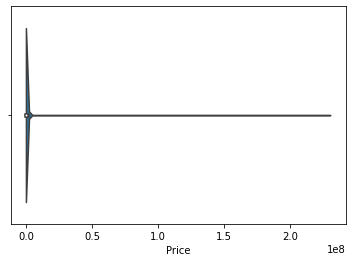

In [63]:
sns.violinplot(x = dataframe['Price'])

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


<AxesSubplot:xlabel='PricePerm2'>

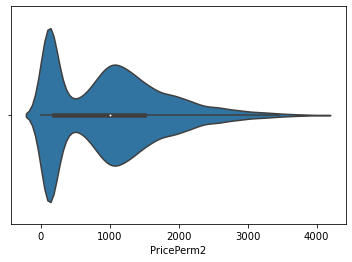

In [94]:
sns.violinplot(x = dataframe['PricePerm2'])

In [64]:
#dataframe = dataframe[dataframe["Price"] > dataframe.Price.quantile(0.25)]
#dataframe = dataframe[dataframe["Price"] < dataframe.Price.quantile(0.75)]
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe.Price.describe()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-274ce3027cc5>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
<ipython-input-64-274ce3027cc5>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * I

count     21582.000000
mean      57910.597579
std       54921.812120
min           0.000000
25%       12000.000000
50%       43000.000000
75%       80000.000000
max      260000.000000
Name: Price, dtype: float64

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


<AxesSubplot:xlabel='Price'>

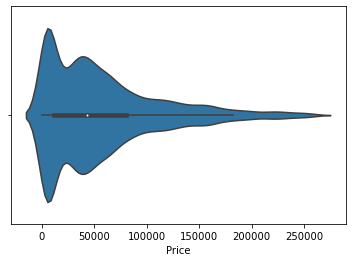

In [95]:
sns.violinplot(x = dataframe['Price'])

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


<AxesSubplot:xlabel='PricePerm2'>

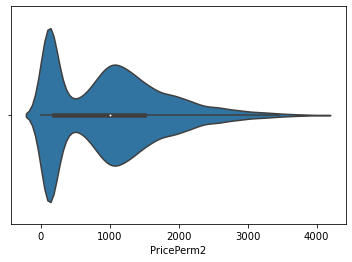

In [96]:
sns.violinplot(x = dataframe['PricePerm2'])

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Area'>

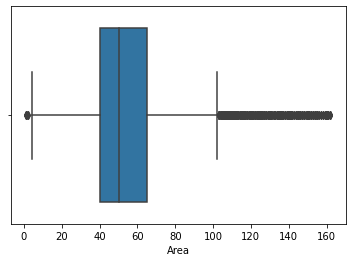

In [67]:
sns.boxplot(x = dataframe['Area'])

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


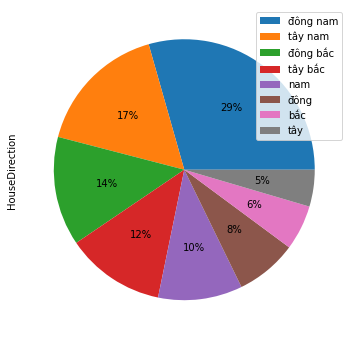

In [68]:
plt.figure(figsize=(20, 6))
dataframe[dataframe['HouseDirection']!='None'].HouseDirection.value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-69-8d4061eb1f93>:5: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(10)


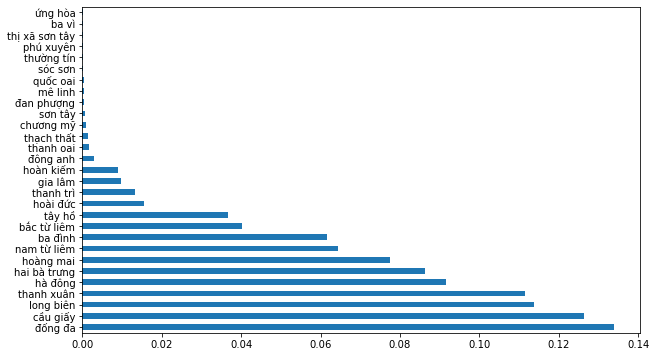

In [69]:
plt.figure(figsize=(10,6))
dataframe[dataframe['District']!='None'].District.value_counts(normalize=True).plot.barh()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


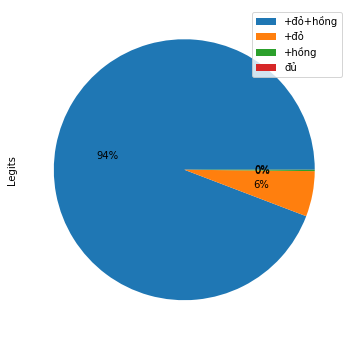

In [70]:
plt.figure(figsize=(20, 6))
dataframe[dataframe['Legits']!='None'].Legits.value_counts(normalize=True).plot(kind='pie', labeldistance=None, autopct="%1.0f%%", legend=True)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

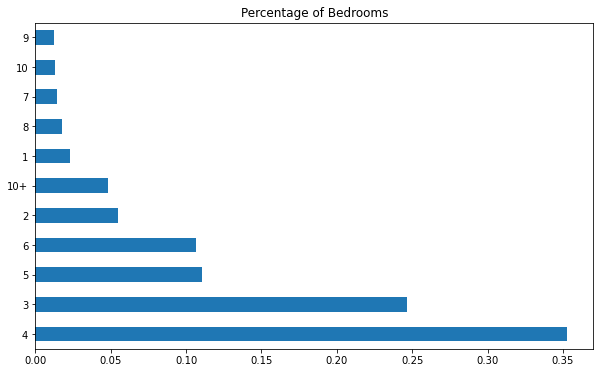

In [71]:
plt.figure(figsize=(10,6))
plt.title("Percentage of Bedrooms")
dataframe[dataframe['Bedrooms']!='None'].Bedrooms.value_counts(normalize=True).plot.barh()
plt.show

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

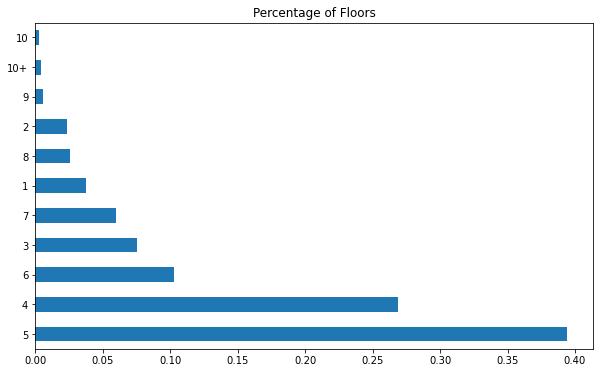

In [72]:
plt.figure(figsize=(10,6))
plt.title("Percentage of Floors")
dataframe[dataframe['Floors']!='None'].Floors.value_counts(normalize=True).plot.barh()
plt.show

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


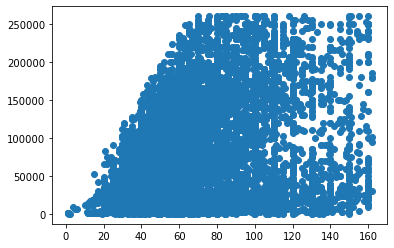

In [97]:
#Plot the scatter plot of price and area of the house
plt.scatter(dataframe.Area, dataframe.Price)

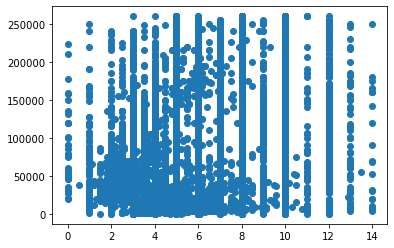

In [74]:
#Plot the scatter plot of price and fascade of the house
plt.scatter(dataframe.Facade, dataframe.Price)

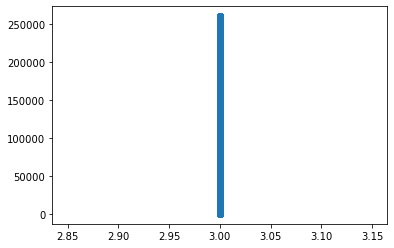

In [98]:
#Plot the scatter plot of price and entrance of the house
# plt.scatter(dataframe.Entrance, dataframe.Price)

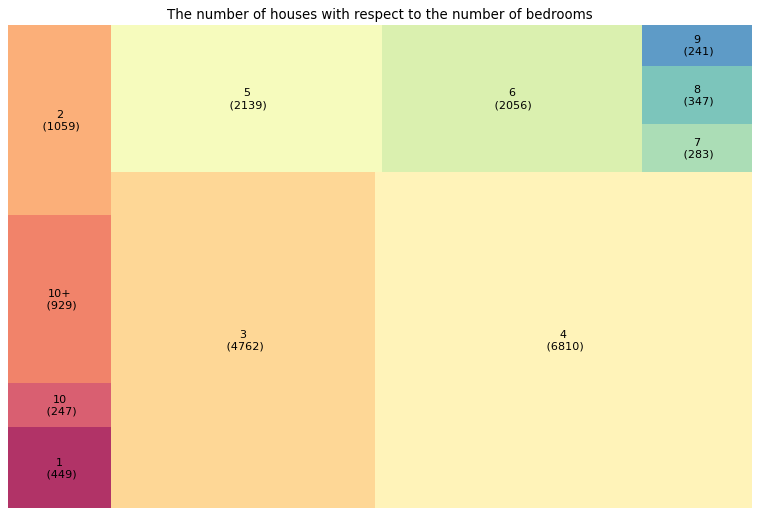

In [76]:
dataframe_for_bedroom1 = dataframe[dataframe['Bedrooms']!='None']
dataframe_for_bedroom1=dataframe_for_bedroom1.groupby('Bedrooms').size().reset_index(name='counts')
labels = dataframe_for_bedroom1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_bedroom1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of bedrooms')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-77-19d071ac4037>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
<ipython-input-77-19d071ac4037>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')


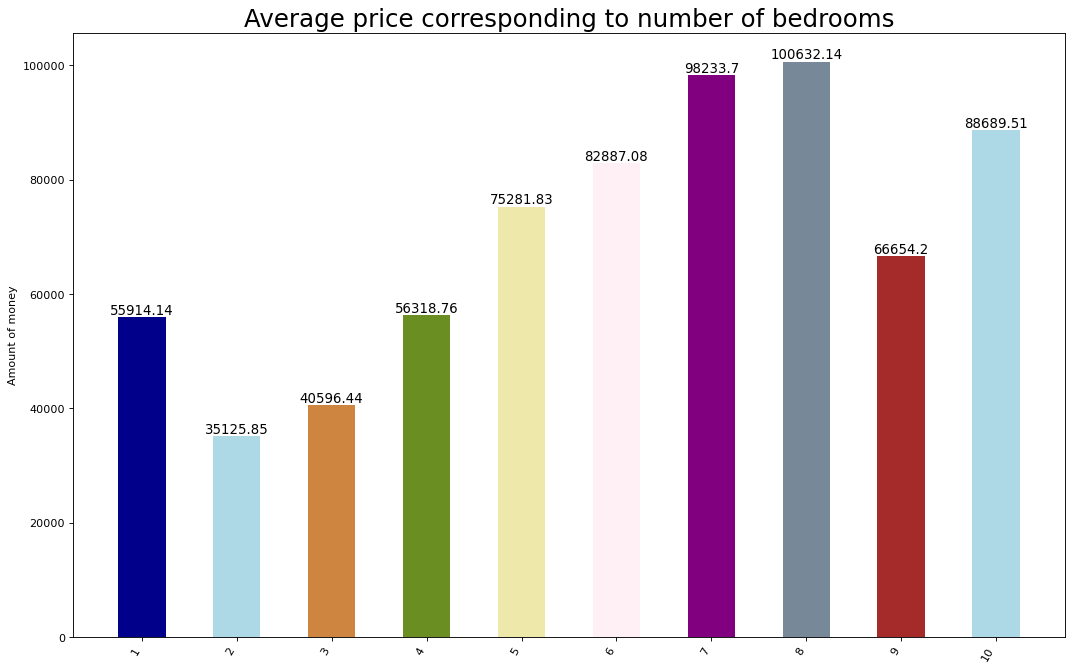

In [77]:
# pic?
dftmp3 = dataframe[dataframe['Bedrooms']!='None']
dftmp3 = dftmp3[dataframe['Bedrooms']!='10+']
df_bedroom = dftmp3.groupby('Bedrooms')['Price'].mean().reset_index(name='Amount of money')
df_bedroom['order'] = df_bedroom['Bedrooms'].apply(lambda x: int(x))
df_bedroom = df_bedroom.sort_values(by = 'order') 
df_bedroom['Amount of money'] = df_bedroom['Amount of money'].apply(lambda x : round(x, 2))
n = df_bedroom['Bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_bedroom['Bedrooms'], df_bedroom['Amount of money'], color=c, width=.5)
for i, val in enumerate(df_bedroom['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_bedroom['Bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of bedrooms", fontsize=22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

In [78]:
dataframe_test = dataframe[dataframe['Bedrooms']!="None"]
value = dataframe_test['Price'].mean()
value

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


60937.24700082807

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2919: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use

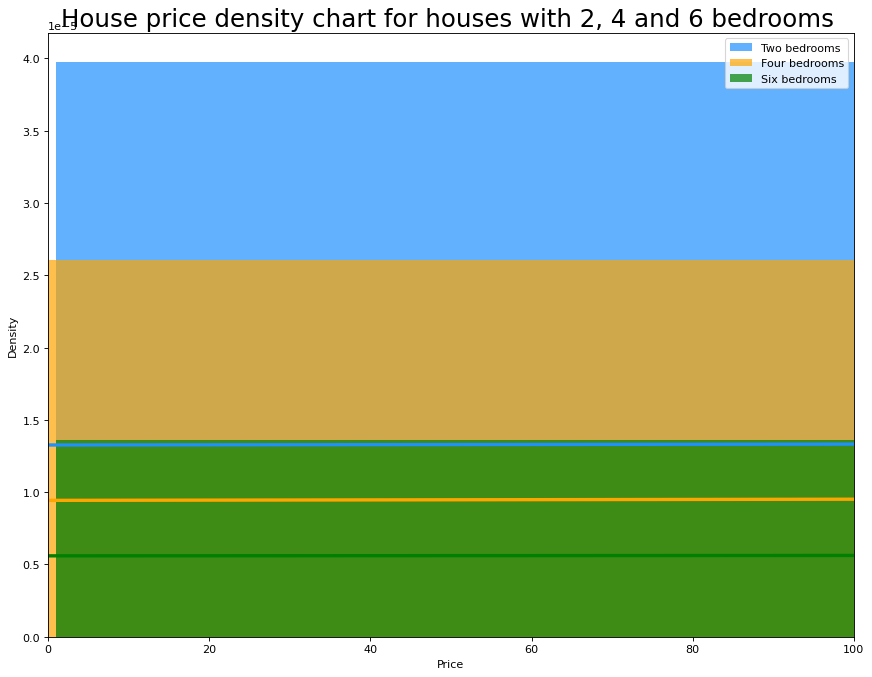

In [79]:
#density is so strange :(()
plt.figure(figsize=(13,10), dpi= 80)
dataframe_for_bedroom_3= dataframe[dataframe['Bedrooms']!='None']
dataframe_for_bedroom_3= dataframe_for_bedroom_3[dataframe_for_bedroom_3['Bedrooms']!='10+']
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 2, "Price"], color="dodgerblue", label="Two bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 4, "Price"], color="orange", label="Four bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(dataframe_for_bedroom_3.loc[dataframe_for_bedroom_3['Bedrooms'].astype(int) == 6, "Price"], color="g", label="Six bedrooms", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.xlim(0, 100)
plt.title('House price density chart for houses with 2, 4 and 6 bedrooms ', fontsize=22)
plt.legend()
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


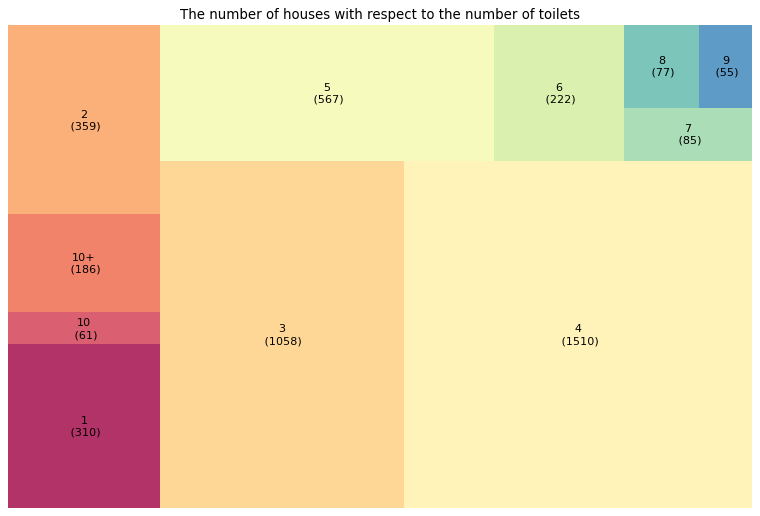

In [80]:
dataframe_for_toilet1 = dataframe[dataframe['Toilets']!='None']
dataframe_for_toilet1=dataframe_for_toilet1.groupby('Toilets').size().reset_index(name='counts')
labels = dataframe_for_toilet1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dataframe_for_toilet1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('The number of houses with respect to the number of toilets')
plt.axis('off')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-81-a9aaf996726f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp4 = dftmp4[dataframe['Toilets']!='10+']
<ipython-input-81-a9aaf996726f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')


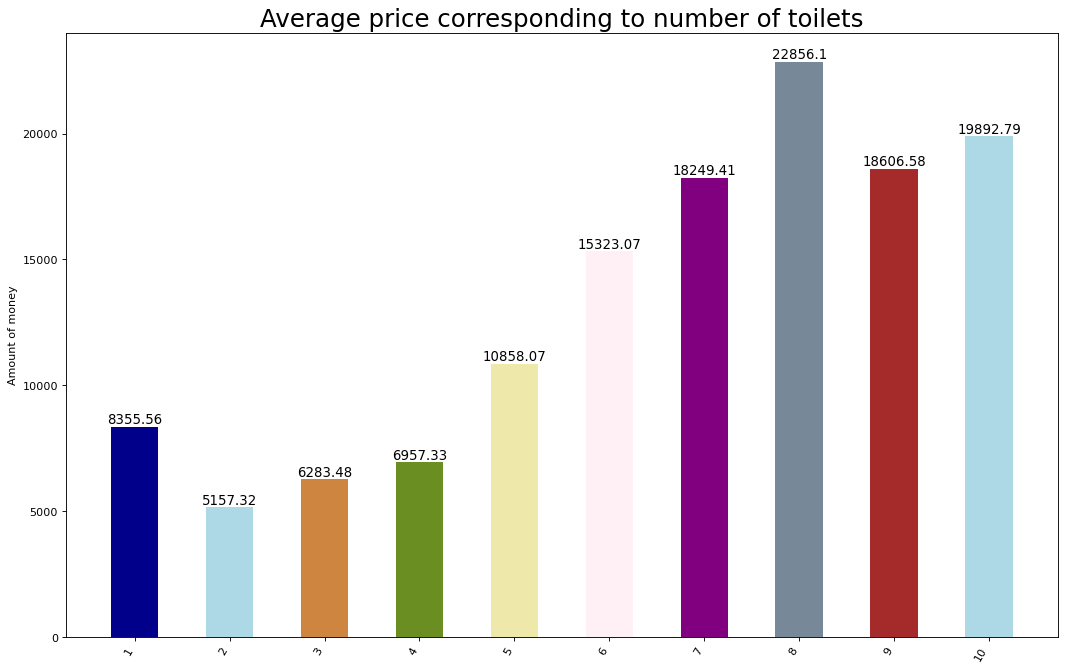

In [81]:
# pic?
dftmp4 = dataframe[dataframe['Toilets']!='None']
dftmp4 = dftmp4[dataframe['Toilets']!='10+']
df_toilet = dftmp4.groupby('Toilets')['Price'].mean().reset_index(name='Amount of money')
df_toilet['order'] = df_toilet['Toilets'].apply(lambda x: int(x))
df_toilet= df_toilet.sort_values(by = 'order') 
df_toilet['Amount of money'] = df_toilet['Amount of money'].apply(lambda x : round(x, 2))
n = df_toilet['Toilets'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_toilet['Toilets'], df_toilet['Amount of money'], color=c, width=.5)
for i, val in enumerate(df_toilet['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_toilet['Toilets'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to number of toilets", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(25,35)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


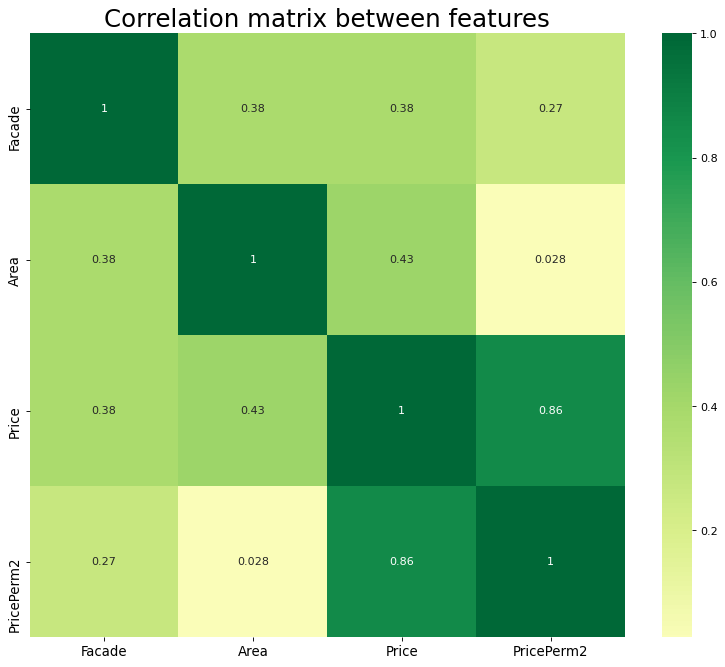

In [100]:
plt.figure(figsize=(12,10), dpi= 80)
dftmp = dataframe.drop(['index'], axis=1)
columns = ['Facade', 'Area', 'Price', 'PricePerm2']
sns.heatmap(dftmp.copy()[columns].corr(), xticklabels=columns, yticklabels=columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlation matrix between features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [83]:
#average house price grouped by districs
df_district = dataframe.copy()


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


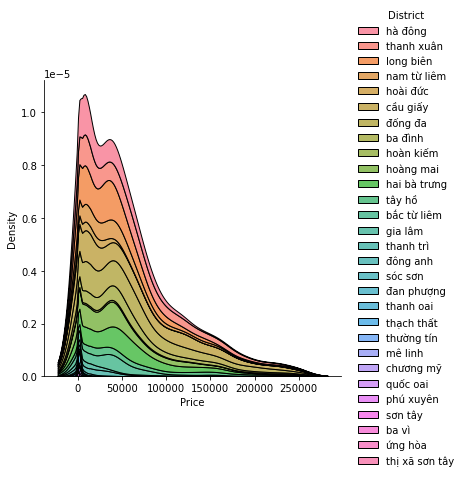

In [119]:
#average house price grouped by districs
df_district = dataframe.copy()
# plt.clf()
sns.displot(df_district, x="Price", hue="District", kind="kde", multiple="stack")
# plt.xlim(0, 100)

In [85]:
print(sns.__version__)

0.11.1


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-86-0cbfa0341ecf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')


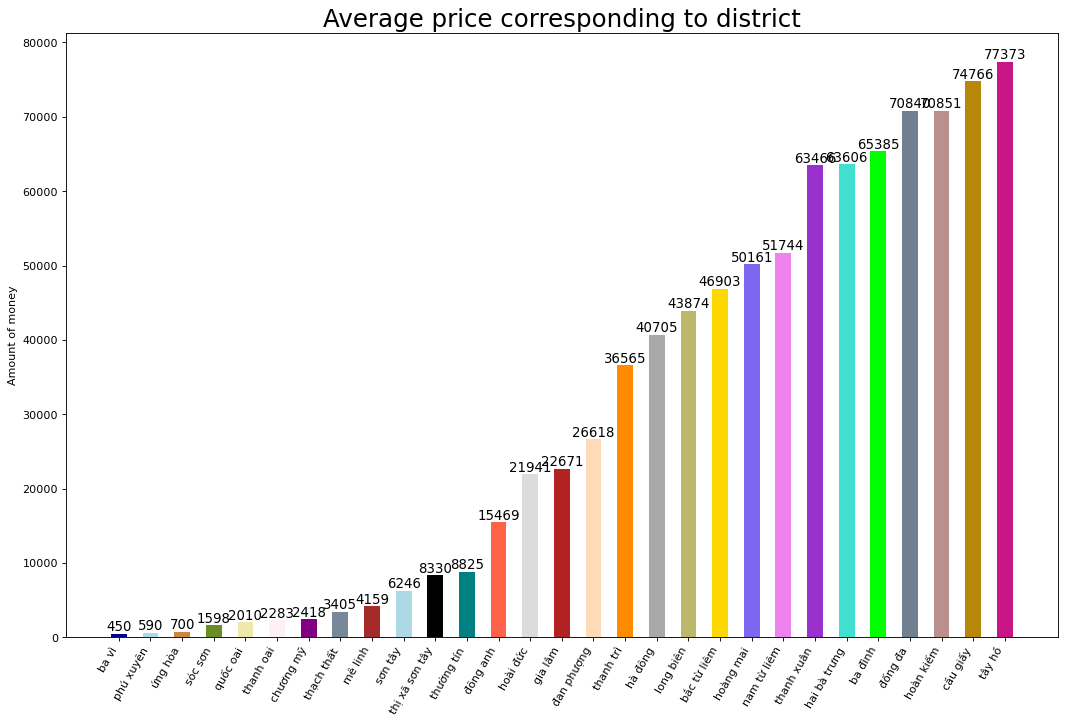

In [86]:
dftmp1 = dataframe[dataframe['District']!='None']
df2 = dftmp1.groupby('District')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : int(x))
n = df2['District'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['District'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['District'], rotation=60, horizontalalignment= 'right')
plt.title("Average price corresponding to district", fontsize=22)
plt.ylabel('Amount of money')
# plt.ylim(25,35)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 800x640 with 0 Axes>

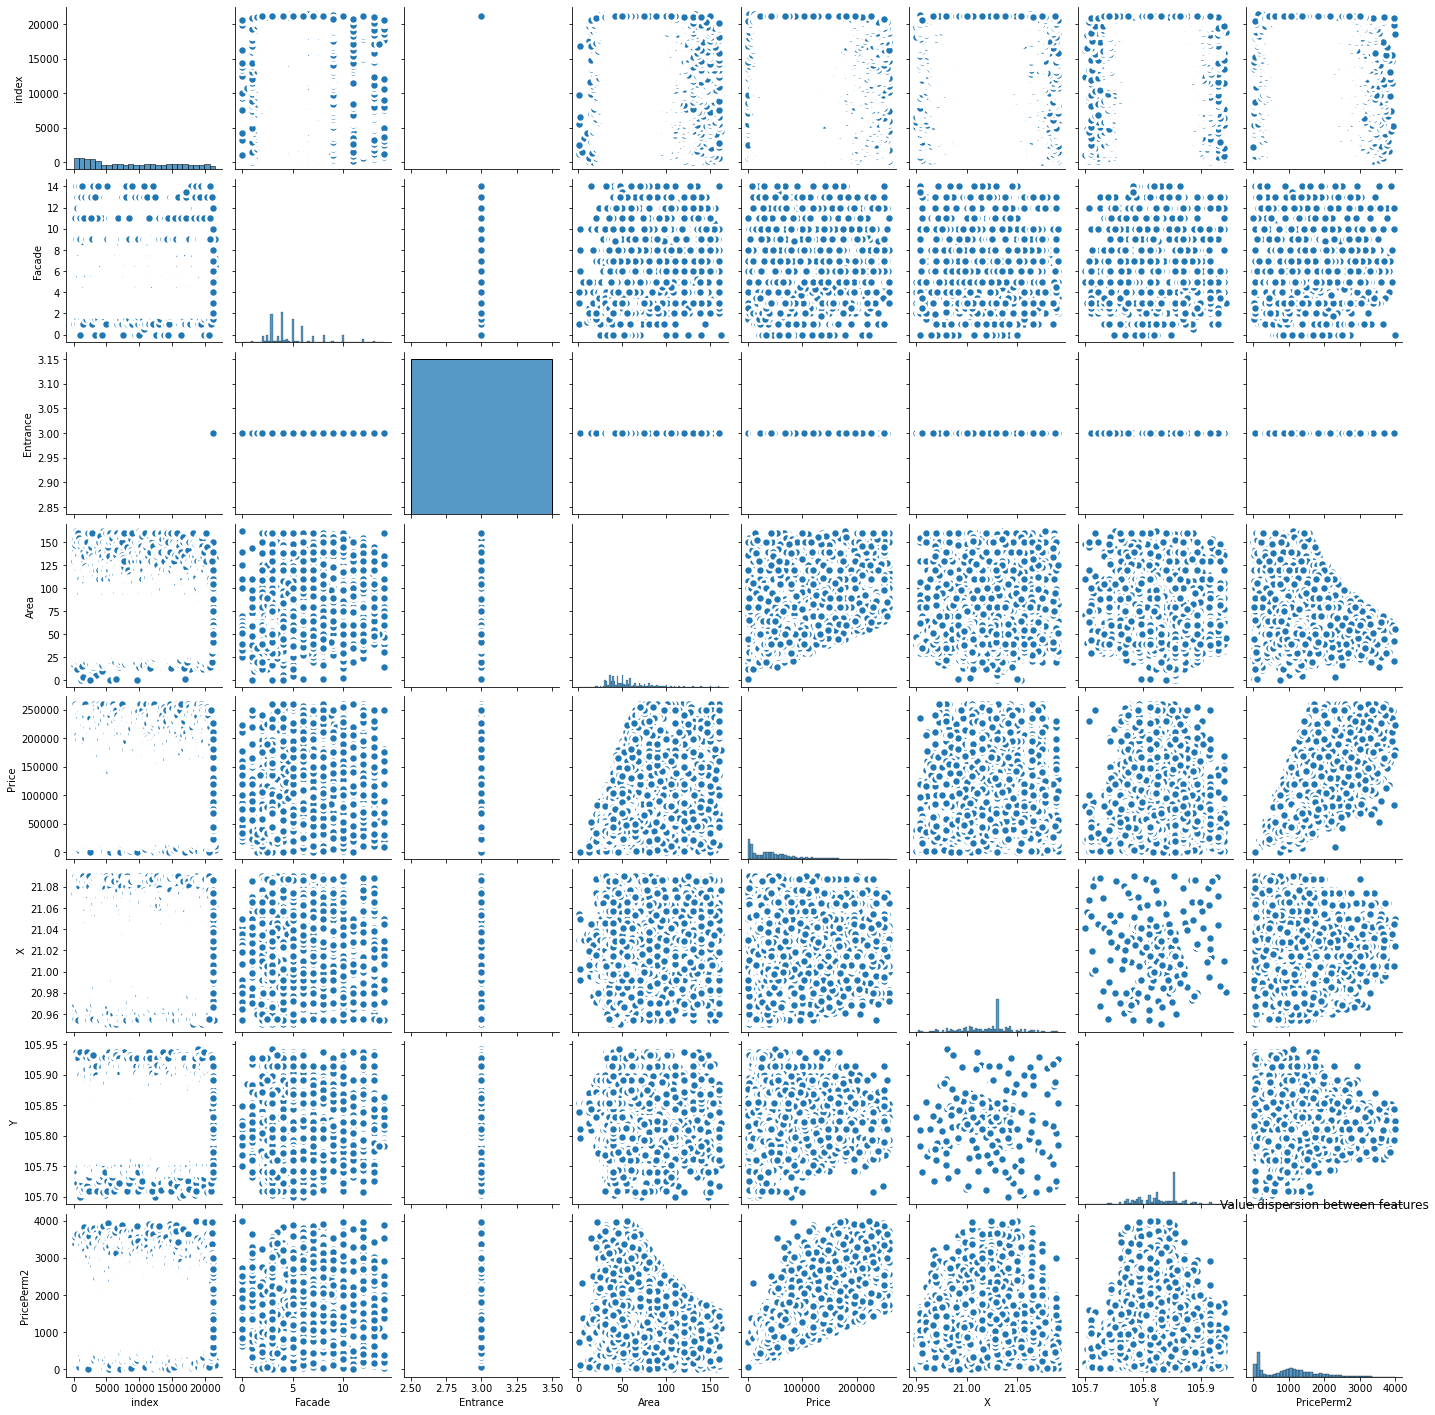

In [87]:
#Chart represeting the relationship between real variables
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataframe, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title('Value dispersion between features')
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-120-e44f1fc3ae2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct['HouseDirection'] = direct['HouseDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )


Text(0.5, 1.0, 'House price distributed by house direction ')

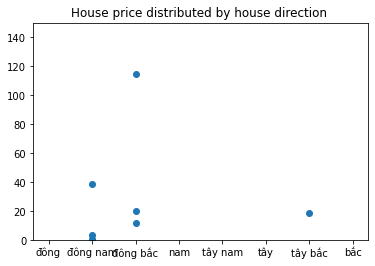

In [120]:
direct = dataframe[dataframe['HouseDirection'] != 'None']
direct['HouseDirection'] = direct['HouseDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )
dir = direct.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
dir = dir.sort_values(by = 'Amount of money', ascending= False).head(8)
topDir = dir['HouseDirection'].unique()
df8 = direct.loc[direct['HouseDirection'].isin(topDir)]
plt.scatter(df8.HouseDirection, df8.Price)
plt.ylim(0,150)
plt.title("House price distributed by house direction ")

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-29c7b3dac1f5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')


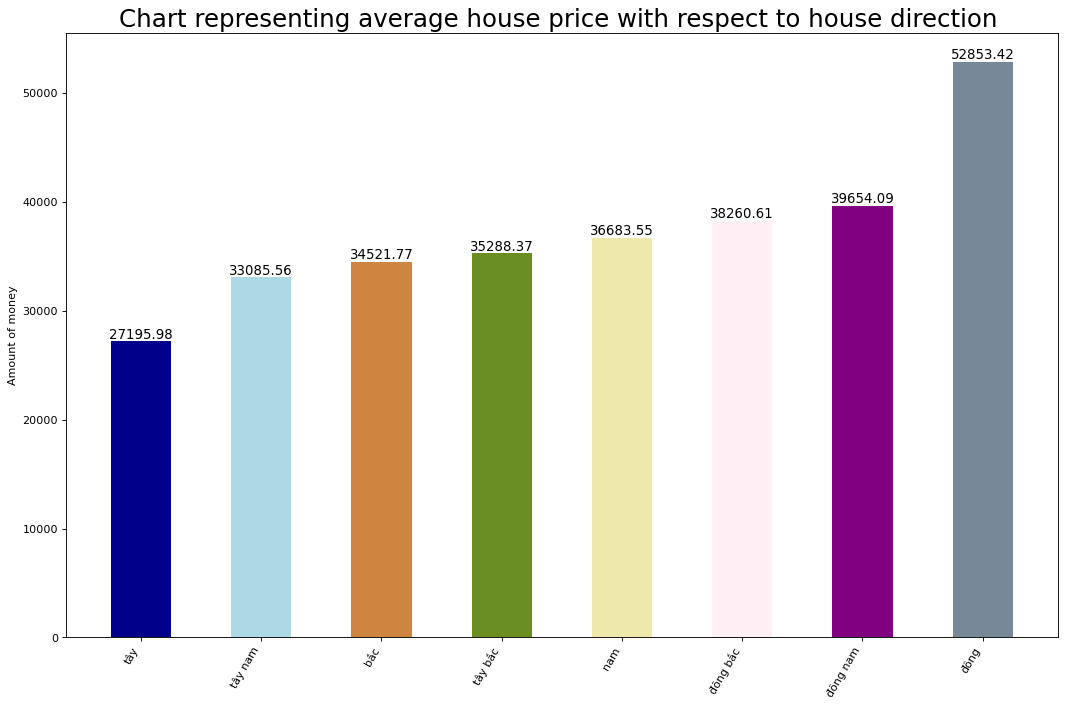

In [121]:
df2 = df8.groupby('HouseDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['HouseDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['HouseDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['HouseDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to house direction ", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-122-09836cd2e372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balcony['BalconyDirection'] = balcony['BalconyDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )


Text(0.5, 1.0, 'House price distributed by balcony direction ')

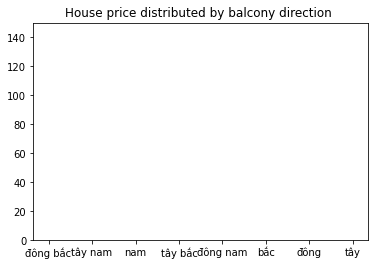

In [122]:
balcony = dataframe[dataframe['BalconyDirection'] != 'None']
balcony['BalconyDirection'] = balcony['BalconyDirection'].apply(lambda x : 'none' if pd.isnull(x) == True else x )
# bal = dftmp[dftmp['balcony'].notnull()]
dir = balcony.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
dir = dir.sort_values(by = 'Amount of money', ascending= False).head(8)
topDir = dir['BalconyDirection'].unique()
df8 = balcony.loc[balcony['BalconyDirection'].isin(topDir)]
plt.scatter(df8.BalconyDirection, df8.Price)
plt.ylim(0,150)
plt.title("House price distributed by balcony direction ")

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-043aa52caf0c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')


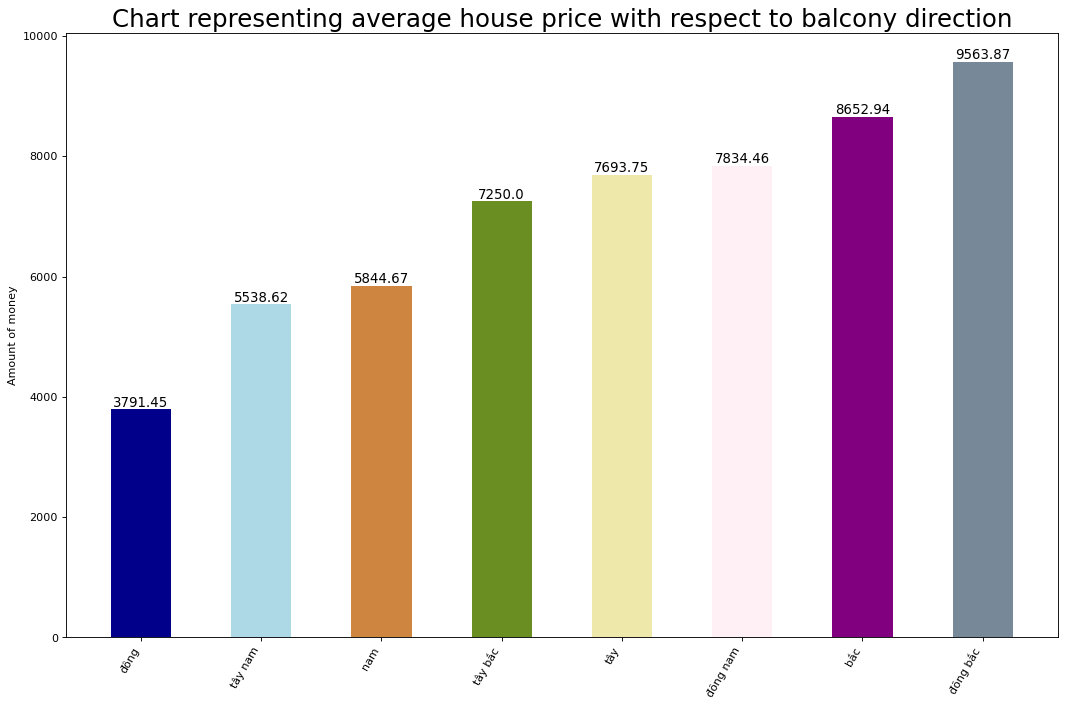

In [92]:
df2 = df8.groupby('BalconyDirection')['Price'].mean().reset_index(name='Amount of money')
df2 = df2.sort_values(by = 'Amount of money') 
df2['Amount of money'] = df2['Amount of money'].apply(lambda x : round(x, 2))
n = df2['BalconyDirection'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['BalconyDirection'], df2['Amount of money'], color=c, width=.5)
for i, val in enumerate(df2['Amount of money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['BalconyDirection'], rotation=60, horizontalalignment= 'right')
plt.title("Chart representing average house price with respect to balcony direction", fontsize=22)
plt.ylabel('Amount of money')
#plt.ylim(20,40)
plt.show()